In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
df= pd.DataFrame({
    "area": [2600,3000,3200,3600,4000],
    "price": [550000, 565000, 610000,680000, 725000]
})

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
df.to_csv('homeprices.csv')

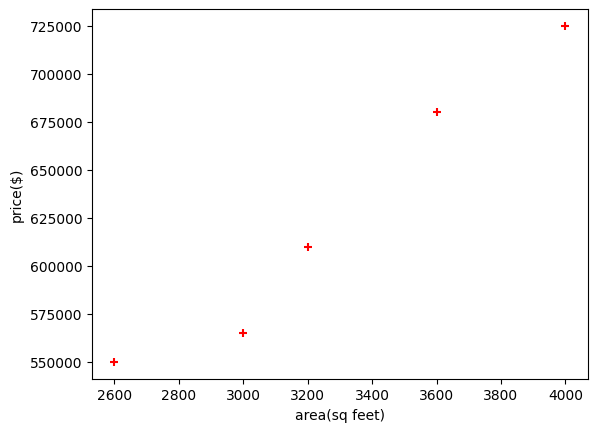

In [7]:
%matplotlib inline
plt.xlabel("area(sq feet)")
plt.ylabel("price($)")
plt.scatter(df.area, df.price, color="red", marker="+")

In [8]:
reg= linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [10]:
reg.predict([[3300]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_

180616.43835616432

In [24]:
import pickle

In [25]:
with open('model_pickle','wb') as f:
    pickle.dump(reg, f)

In [26]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [27]:
mp.predict([[5000]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [29]:
import joblib

In [30]:
joblib.dump(reg,'model_joblib')


['model_joblib']

In [31]:
mj= joblib.load('model_joblib')

In [32]:
mj.predict([[5000]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [33]:
from word2number import w2n

In [34]:
df= pd.DataFrame({
    'area': [2000,3000,3200,3600, 4000],
    "bedroom": [3.0,4.0, np.NaN, 3.0, 5.0],
    'age': [20,15,18,30,8],
    'price': [550000, 565000, 610000, 595000, 760000]
})

In [35]:
df

,area,bedroom,age,price
0,2000,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [36]:
import math
median_bedroom = math.floor(df.bedroom.median())
median_bedroom

3

In [39]:
 df.bedroom.fillna(median_bedroom)

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: bedroom, dtype: float64

In [40]:
df

,area,bedroom,age,price
0,2000,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [42]:
reg2 = linear_model.LinearRegression()
reg.fit(df[['area','bedroom','age']], df.price)

LinearRegression()

In [43]:
reg.predict([[6000,5,1]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([907803.81165923])

In [44]:
reg.predict([[6000,5,10]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([867091.92825116])

In [45]:
reg.predict([[6000,20,10]])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([963246.63677134])

In [46]:
dict1 = {
    "mileage": [69000,35000,57000,22500, 46000, 59000, 52000, 72000, 91000, 67000],
    "age(yrs)" : [6,3,5,2,4,5,5,6,8,6],
    "sell prices($)" :[18000, 34000, 26100, 40000, 31500, 26750, 32000, 19300, 12000, 22000]
}

In [47]:
df= pd.DataFrame(dict1)

In [48]:
df

,mileage,age(yrs),sell prices($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [49]:
df.to_csv('bmw_false_index.csv', index= False)

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

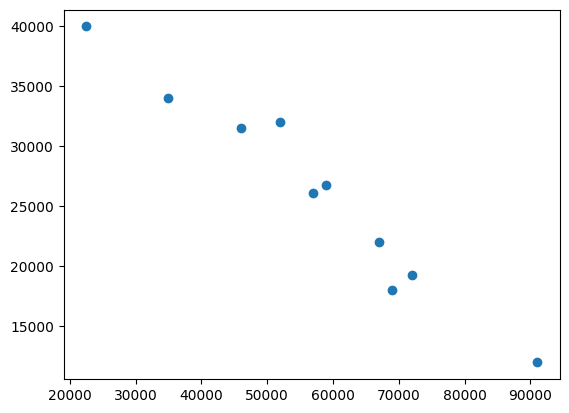

In [51]:
plt.scatter( df["mileage"], df['sell prices($)'] )

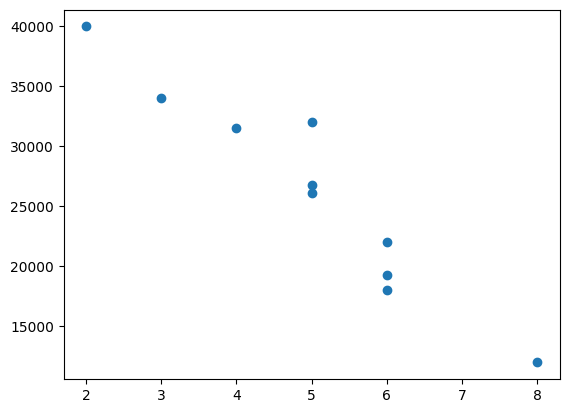

In [52]:
plt.scatter( df["age(yrs)"], df['sell prices($)'] )

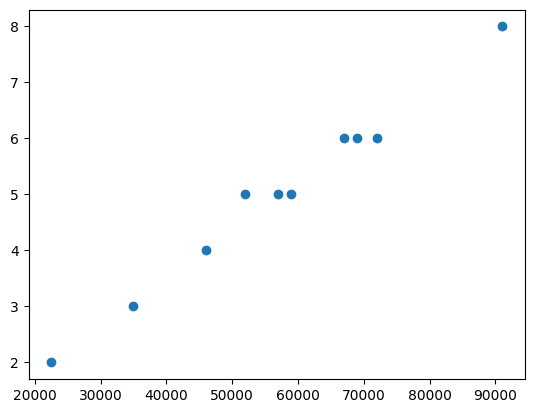

In [53]:
plt.scatter( df["mileage"], df['age(yrs)'] )

In [56]:
x= df[['mileage', 'age(yrs)']]
y= df['sell prices($)']

In [57]:
x

,mileage,age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [58]:
y

0    18000
1    34000
2    26100
3    40000
4    31500
5    26750
6    32000
7    19300
8    12000
9    22000
Name: sell prices($), dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size= 0.2)

In [61]:
len(x_train)

8

In [63]:
from sklearn.linear_model import LinearRegression
clf= LinearRegression()

In [64]:
clf.fit(x_train, y_train)

LinearRegression()

In [65]:
clf.predict(x_test)

array([24086.96245482, 34858.23190971])

In [66]:
y_test

5    26750
1    34000
Name: sell prices($), dtype: int64

In [69]:
clf.score(x_test, y_test)

0.7021324717093553